# Data Analyst - EDA 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## About This Dataset 

Amidst the pandemic many people lost their jobs, with this dataset it is possible to hone the job search so that more people in need can find employment.
This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions, with features such as:

- Salary Estimate
- Location
- Company Rating
- Job Description
and more.

# Data Wrangling 

In [2]:
dataset = pd.read_csv("DataAnalyst.csv" , index_col = 0)
dataset.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1


In [3]:
dataset.shape

(2253, 15)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 281.6+ KB


In [5]:
dataset.describe()

,Rating,Founded
count,2253.000000,2253.000000
mean,3.160630,1398.522858
std,1.665228,901.929251
min,-1.000000,-1.000000
25%,3.100000,-1.000000
50%,3.600000,1979.000000
75%,4.000000,2002.000000
max,5.000000,2019.000000


In [6]:
dataset.describe(include = "O")

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,2253,2253,2253,2252,2253,2253,2253,2253,2253,2253,2253,2253,2253
unique,1272,90,2253,1513,253,483,9,15,89,25,14,291,2
top,Data Analyst,$41K-$78K (Glassdoor est.),Business Unit: Summary Responsible for working...,"Staffigo Technical Services, LLC\n5.0","New York, NY","New York, NY",51 to 200 employees,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1,-1
freq,405,57,1,58,310,206,421,1273,353,570,615,1732,2173


In [7]:
dataset.columns = dataset.columns.str.replace(" " , "_")
dataset.head(1)

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True


In [8]:
dataset.Job_Title.value_counts().head()

Data Analyst             405
Senior Data Analyst       90
Junior Data Analyst       30
Business Data Analyst     28
Sr. Data Analyst          21
Name: Job_Title, dtype: int64

In [9]:
dataset.Job_Title.replace({"Sr. Data Analyst":"Senior Data Analyst", "Sr Data Analyst":"Senior Data Analyst" , 
                           "DATA ANALYST": "Data Analyst" , "Data analyst": "Data Analyst" , 
                           "Jr Data Analyst":"Junior Data Analyst"} , inplace = True)

In [10]:
dataset.Salary_Estimate.value_counts().head()

$41K-$78K (Glassdoor est.)    57
$42K-$76K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
Name: Salary_Estimate, dtype: int64

In [11]:
sal_samp = dataset.Salary_Estimate.str.split("-" , expand = True)
dataset["Min_salary_USD_k"] = pd.to_numeric(sal_samp[0].str.extract('(\d+)' , expand = False))
dataset["Max_salary_USD_k"] = pd.to_numeric(sal_samp[1].str.extract('(\d+)' , expand = False))

In [12]:
dataset.loc[: , ["Min_salary_USD_k","Max_salary_USD_k"]].head(5)

,Min_salary_USD_k,Max_salary_USD_k
0,37.0,66
1,37.0,66
2,37.0,66
3,37.0,66
4,37.0,66


In [13]:
dataset.Company_Name.head()

0             Vera Institute of Justice\n3.2
1    Visiting Nurse Service of New York\n3.8
2                           Squarespace\n3.4
3                              Celerity\n4.1
4                               FanDuel\n3.9
Name: Company_Name, dtype: object

In [14]:
split1 = dataset.Company_Name.str.split("\n",expand = True)
dataset["Company_Name"] = split1[0]
dataset.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply,Min_salary_USD_k,Max_salary_USD_k
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37.0,66
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37.0,66
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37.0,66
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37.0,66
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66


In [15]:
split2 = dataset.Location.str.split("," , expand = True)
dataset["City"] = split2[0]
dataset["State"] = split2[1]

In [16]:
dataset.loc[dataset.State.str.contains("Arapahoe") , "State"] = "CO"

In [17]:
dataset.State = dataset.State.str.strip()

In [18]:
abb = {"CA" :  "California", 
       "TX" :  "Texas",
       "NY" :  "New York",
       "IL" :  "Illinois",
       "PA" :  "Pennsylvania",
       "AZ" :  "Arizona",
       "CO" :  "Colorado",    
       "NC" :  "North California",
       "NJ" :  "New Jersey",    
       "WA" :  "Washington",
       "VA" :  "Virginia",
       "OH" :  "Ohio",
       "UT" :  "Utah",
       "FL" :  "Florida",
       "IN" :  "Indiana",
       "DE" :  "Delaware",
       "GA" :  "Georgia",
       "SC" :  "South California",    
       "KS" :  "Kansas"  }

In [19]:
dataset["State"] = dataset.State.map(abb)

In [20]:
dataset.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply,Min_salary_USD_k,Max_salary_USD_k,City,State
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37.0,66,New York,New York
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37.0,66,New York,New York
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37.0,66,New York,New York
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37.0,66,New York,New York
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66,New York,New York


In [21]:
dataset.Size.value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: int64

In [22]:
dataset.Revenue.value_counts()

Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
-1                                  163
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

In [23]:
dataset.Industry.value_counts().head()

-1                                  353
IT Services                         325
Staffing & Outsourcing              323
Health Care Services & Hospitals    151
Consulting                          111
Name: Industry, dtype: int64

In [24]:
dataset.Easy_Apply.value_counts()

-1      2173
True      80
Name: Easy_Apply, dtype: int64

In [25]:
dataset.Competitors.value_counts().head()

-1                                                      1732
Robert Half, Insight Global                               14
Adecco, Manpower                                          14
Google, Microsoft, Samsung Electronics                    10
Artech Information Systems, Mindlance, Tech Mahindra      10
Name: Competitors, dtype: int64

In [26]:
dataset.drop(columns = "Competitors" , inplace = True)
dataset.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Easy_Apply,Min_salary_USD_k,Max_salary_USD_k,City,State
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True,37.0,66,New York,New York
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,37.0,66,New York,New York
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,37.0,66,New York,New York
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,37.0,66,New York,New York
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True,37.0,66,New York,New York


In [27]:
len(dataset.loc[(dataset[dataset.columns] == -1).any(1)])

680

In [28]:
len(dataset.loc[(dataset[dataset.columns] == "-1" ).any(1)])

C:\Users\Vamsikrishna\anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


2173

In [29]:
dataset.replace(-1, np.nan , inplace = True)

In [30]:
dataset.replace("-1" , np.nan , inplace = True)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job_Title          2253 non-null   object 
 1   Salary_Estimate    2252 non-null   object 
 2   Job_Description    2253 non-null   object 
 3   Rating             1981 non-null   float64
 4   Company_Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2081 non-null   object 
 7   Size               2090 non-null   object 
 8   Founded            1593 non-null   float64
 9   Type_of_ownership  2090 non-null   object 
 10  Industry           1900 non-null   object 
 11  Sector             1900 non-null   object 
 12  Revenue            2090 non-null   object 
 13  Easy_Apply         80 non-null     object 
 14  Min_salary_USD_k   2252 non-null   float64
 15  Max_salary_USD_k   2253 non-null   int64  
 16  City               2253 

In [33]:
def Missing_Values_dataframe(dataset):
        null_val = dataset.isnull().sum(0)
        
        null_val_percent = 100 * dataset.isnull().sum(0) / len(dataset)
        
        null_val_df = pd.concat([null_val, null_val_percent], axis=1)
        
        null_val_df = null_val_df.rename(mapper = {0 : "Missing Values", 1 : '% of Missing Values'} , axis = "columns")
        
        null_val_df = null_val_df.sort_values(by = "% of Missing Values" , ascending = False ).round(2)
        
        return null_val_df


In [34]:
Missing_Values_dataframe(dataset)

,Missing Values,% of Missing Values
Easy_Apply,2173,96.45
Founded,660,29.29
Industry,353,15.67
Sector,353,15.67
Rating,272,12.07
Headquarters,172,7.63
Type_of_ownership,163,7.23
Size,163,7.23
Revenue,163,7.23
Min_salary_USD_k,1,0.04


In [35]:
dataset["Easy_Apply"] = dataset.Easy_Apply.fillna(value = False)

In [36]:
dataset["Avg_salary_USD_k"] = (dataset["Max_salary_USD_k"] + dataset["Min_salary_USD_k"]) / 2

New column(Rating_Range) is formed , this helps us in easily analysing high rated companies.

In [37]:
dataset["Rating_Range"] = pd.cut(dataset.Rating , bins= [0 , 2.75 , 4.2 ,5] , 
                                 labels = ["Low Rated" , "Medium Rated" , "High Rated"])

# Visualising Data

Rating of companies located in respective states.
Box plots show the five-number summary of a set of data.

Text(0.5, 1, 'Rating of Companies VS State')

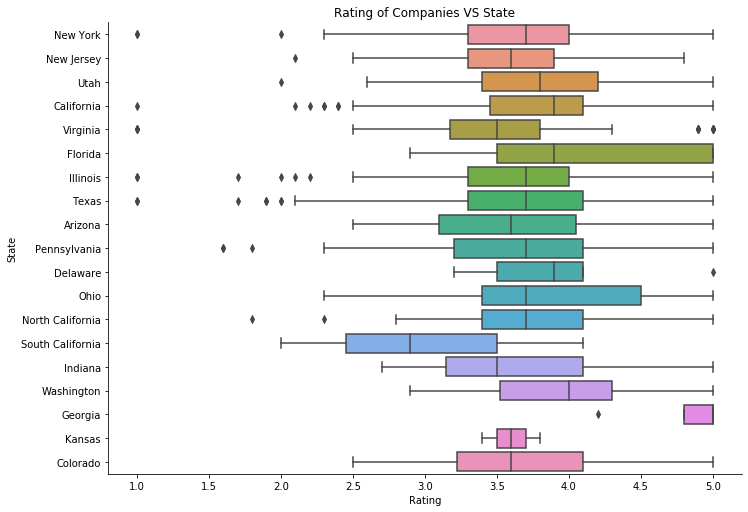

In [40]:
sns.catplot(kind = "box" ,x = "Rating", y = "State"  , data = dataset , height = 7, aspect = 1.5)
plt.title("Rating of Companies VS State")

Minimum Salary by companies located in respective states.

Text(0.5, 1, 'Minimum Salary by Companies Respect to State')

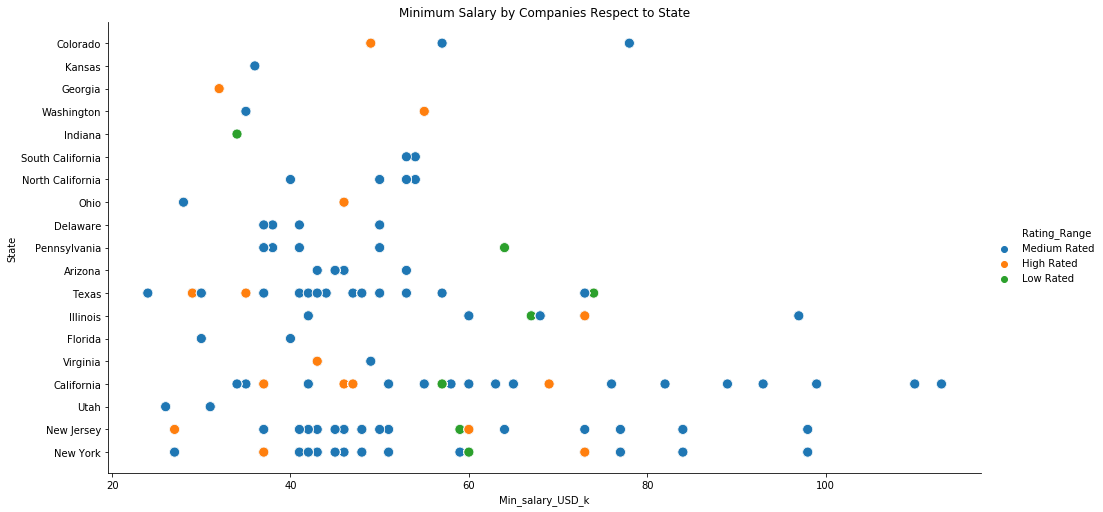

In [42]:
sns.relplot(kind = "scatter" , y = "State" ,x = "Min_salary_USD_k", hue = "Rating_Range",  
            s = 100,data = dataset ,height = 7 , aspect = 2 , cmap = 'viridis')
plt.title("Minimum Salary by Companies Respect to State")

Maximum Salary by companies located in respective states.

Text(0.5, 1, ' Maximum Salary by Companies Respect to State')

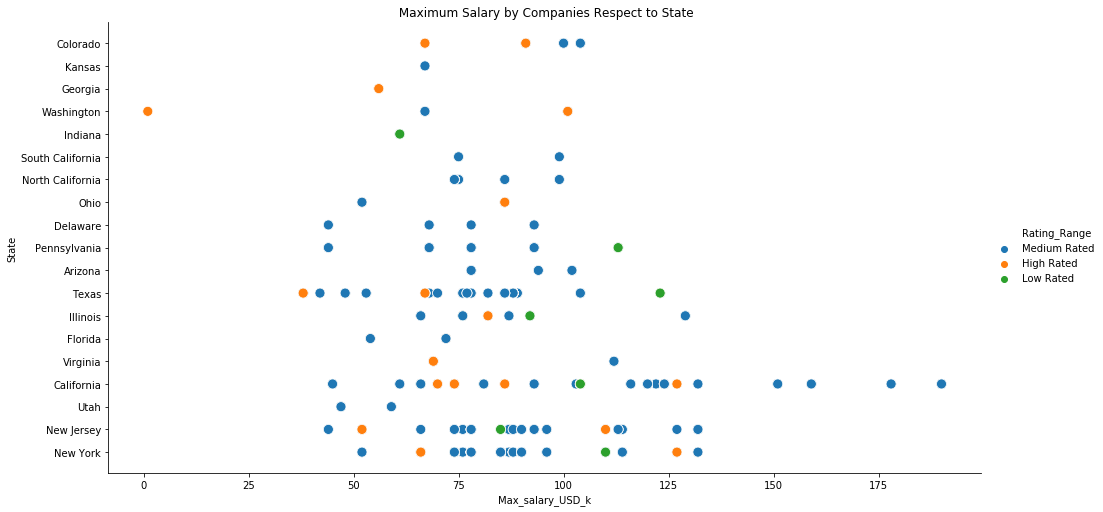

In [43]:
sns.relplot(kind = "scatter" , y = "State" , x = "Max_salary_USD_k", hue = "Rating_Range",
            data = dataset, height = 7 , aspect = 2 ,s = 100 )
plt.title(" Maximum Salary by Companies Respect to State")

Grouping data by state.
- Visualizing Avg , Min , Max Salaries with respect to companies located in different states.

In [44]:
state_data = dataset.groupby("State")[["Rating","Min_salary_USD_k","Max_salary_USD_k" , "Avg_salary_USD_k"]].mean()
state_data = state_data.reset_index()
state_data.sort_values("Avg_salary_USD_k" , ascending = False , inplace = True)

Text(0.5, 1, 'Avg Rating of Companies respect to States ')

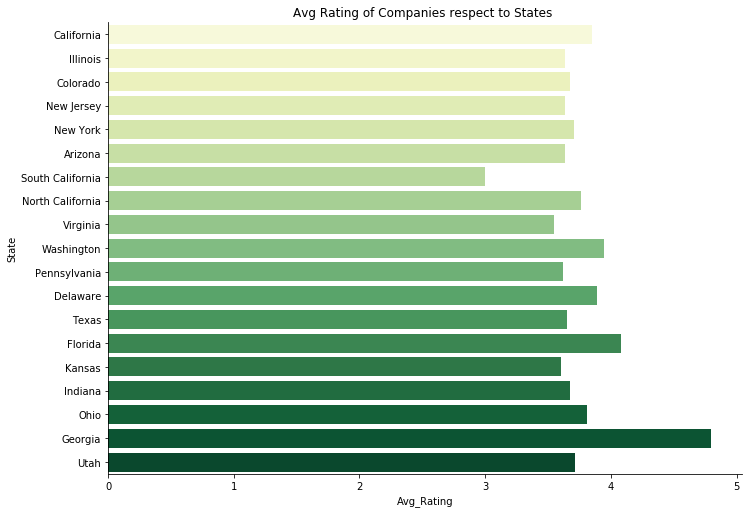

In [45]:
sns.catplot(kind = "bar" , x = "Rating" ,y = "State" , data = state_data , height = 7 , aspect = 1.5 , 
            palette = 'YlGn')
plt.xlabel("Avg_Rating")
plt.title("Avg Rating of Companies respect to States ")

Text(0.5, 1, 'Minimum Salary by State')

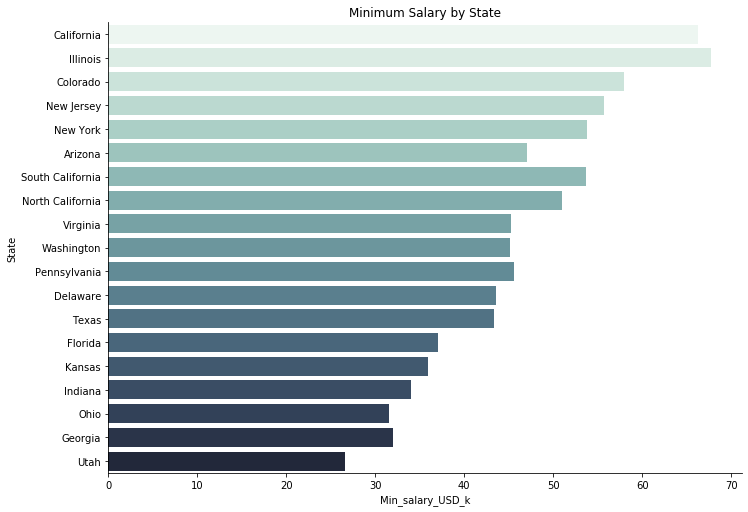

In [46]:
sns.catplot(kind = "bar" , x = "Min_salary_USD_k" ,y = "State" , data = state_data , height = 7 , aspect = 1.5 
            , palette = 'ch:r= -0.3,l=0.95')
plt.title("Minimum Salary by State")

Text(0.5, 1, 'Maximum Salary by State')

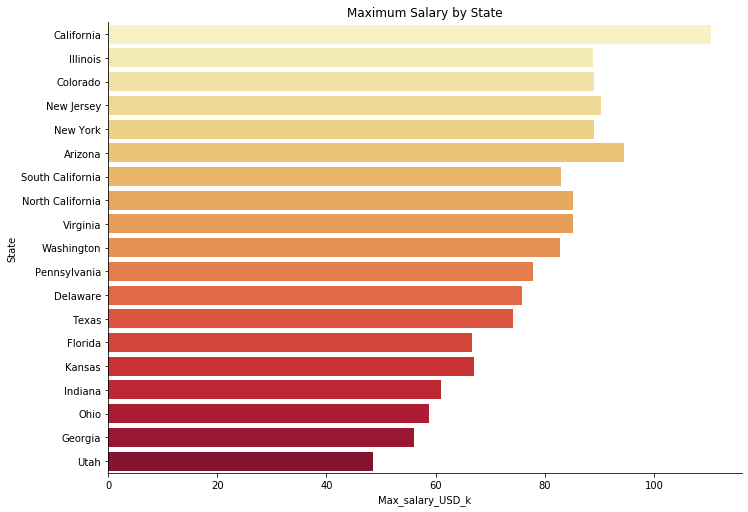

In [47]:
sns.catplot(kind = "bar" , x = "Max_salary_USD_k" ,y = "State" , data = state_data , height = 7 , aspect = 1.5 
            , palette = 'YlOrRd')
plt.title("Maximum Salary by State")

Text(0.5, 1, 'Average Salary by State')

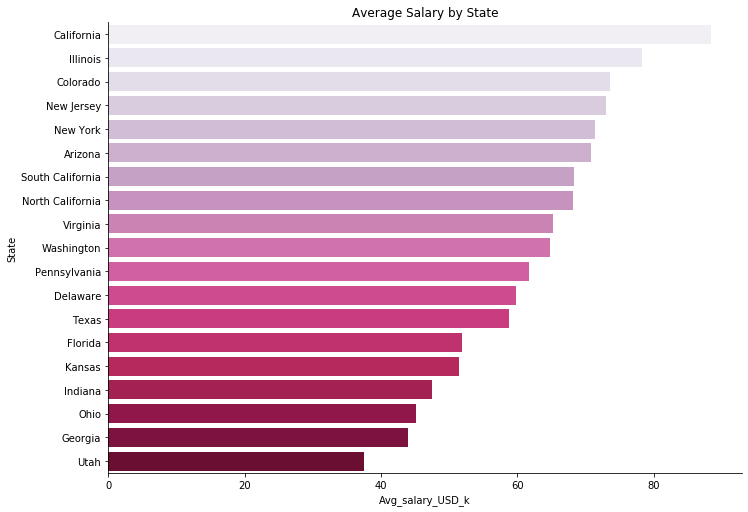

In [48]:
sns.catplot(kind= "bar" , x = "Avg_salary_USD_k" , y = "State" , data = state_data , height = 7 , aspect = 1.5 ,
           palette = 'PuRd')
plt.title("Average Salary by State")

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job_Title          2253 non-null   object  
 1   Salary_Estimate    2252 non-null   object  
 2   Job_Description    2253 non-null   object  
 3   Rating             1981 non-null   float64 
 4   Company_Name       2252 non-null   object  
 5   Location           2253 non-null   object  
 6   Headquarters       2081 non-null   object  
 7   Size               2090 non-null   object  
 8   Founded            1593 non-null   float64 
 9   Type_of_ownership  2090 non-null   object  
 10  Industry           1900 non-null   object  
 11  Sector             1900 non-null   object  
 12  Revenue            2090 non-null   object  
 13  Easy_Apply         2253 non-null   object  
 14  Min_salary_USD_k   2252 non-null   float64 
 15  Max_salary_USD_k   2253 non-null   int64   
 16  City  

Forming a new column Salary_Range helps us in easyily analysing data distribution of salary.

In [50]:
dataset["Salary_Range"] = pd.qcut(dataset.Avg_salary_USD_k , q = [0 , 0.4 , 0.80  , 1] ,
                                  labels = ["Low Salary" , "Medium Salary" , "High Salary"])

In [51]:
#dataset.loc[dataset.Salary_Range == "Low Salary"].sort_values("Avg_salary_USD_k")
#dataset.loc[dataset.Salary_Range == "Medium Salary"].sort_values("Avg_salary_USD_k")
#dataset.loc[dataset.Salary_Range == "High Salary"].sort_values("Avg_salary_USD_k")
dataset.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,...,Sector,Revenue,Easy_Apply,Min_salary_USD_k,Max_salary_USD_k,City,State,Avg_salary_USD_k,Rating_Range,Salary_Range
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,...,Non-Profit,$100 to $500 million (USD),True,37.0,66,New York,New York,51.5,Medium Rated,Low Salary
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,...,Health Care,$2 to $5 billion (USD),False,37.0,66,New York,New York,51.5,Medium Rated,Low Salary
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,...,Information Technology,Unknown / Non-Applicable,False,37.0,66,New York,New York,51.5,Medium Rated,Low Salary
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,...,Information Technology,$50 to $100 million (USD),False,37.0,66,New York,New York,51.5,Medium Rated,Low Salary
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,...,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True,37.0,66,New York,New York,51.5,Medium Rated,Low Salary


Grouping data with Sector and Visualizing high paid sectors.

In [52]:
sector_data = dataset.groupby("Sector").Avg_salary_USD_k.mean()
sector_data.sort_values(ascending = False,inplace = True)
sector_data = sector_data.reset_index()
sector_data.head()

,Sector,Avg_salary_USD_k
0,Biotech & Pharmaceuticals,83.106061
1,Real Estate,80.916667
2,"Arts, Entertainment & Recreation",80.642857
3,Accounting & Legal,75.220930
4,Information Technology,74.247368


Text(0.5, 1, 'Avg Salary by Sector')

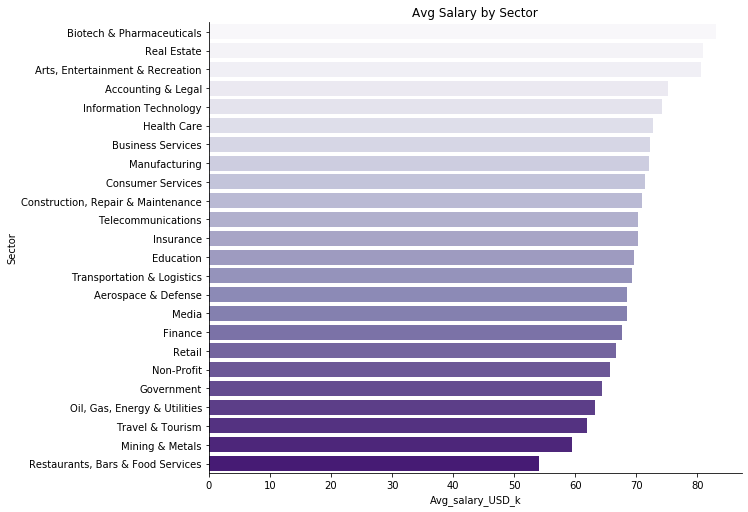

In [53]:
sns.catplot(kind = 'bar' , data = sector_data , y = "Sector" , x = "Avg_salary_USD_k", height = 7 , aspect = 1.5, 
           palette = "Purples")
plt.title("Avg Salary by Sector")

In [54]:
sector_sal_data = dataset.groupby(["Sector" , "Salary_Range"]).Avg_salary_USD_k.mean()
sector_sal_data.sort_values(ascending = False , inplace = True)
sector_sal_data = sector_sal_data.reset_index()
#pd.options.display.max_rows = 75
sector_sal_data.head(6)

,Sector,Salary_Range,Avg_salary_USD_k
0,Retail,High Salary,125.750000
1,Real Estate,High Salary,123.166667
2,"Construction, Repair & Maintenance",High Salary,122.500000
3,Manufacturing,High Salary,118.928571
4,Accounting & Legal,High Salary,115.250000
5,"Arts, Entertainment & Recreation",High Salary,114.000000


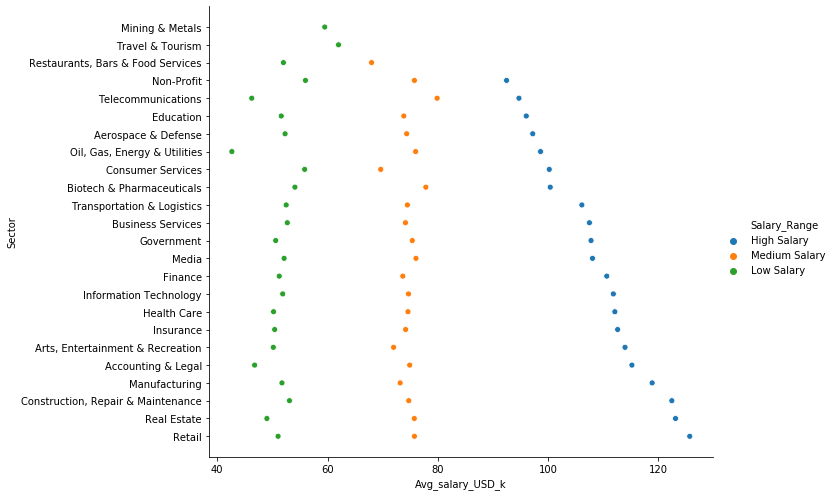

In [55]:
sns.relplot(kind = 'scatter' , data = sector_sal_data , y = "Sector" , x = "Avg_salary_USD_k" , hue = 'Salary_Range'
            , height = 7 , aspect = 1.5  )

Let's figure out High_Demand_jobs.

In [56]:
High_Demand_jobs = dataset.Job_Title.value_counts().head(25)
High_Demand_jobs = High_Demand_jobs.reset_index()

In [57]:
High_Demand_jobs.rename(columns = {"index" : "Job_Title" , "Job_Title" : "No_of_Companies"} , inplace = True)

Text(0.5, 1, 'High_Demand_jobs')

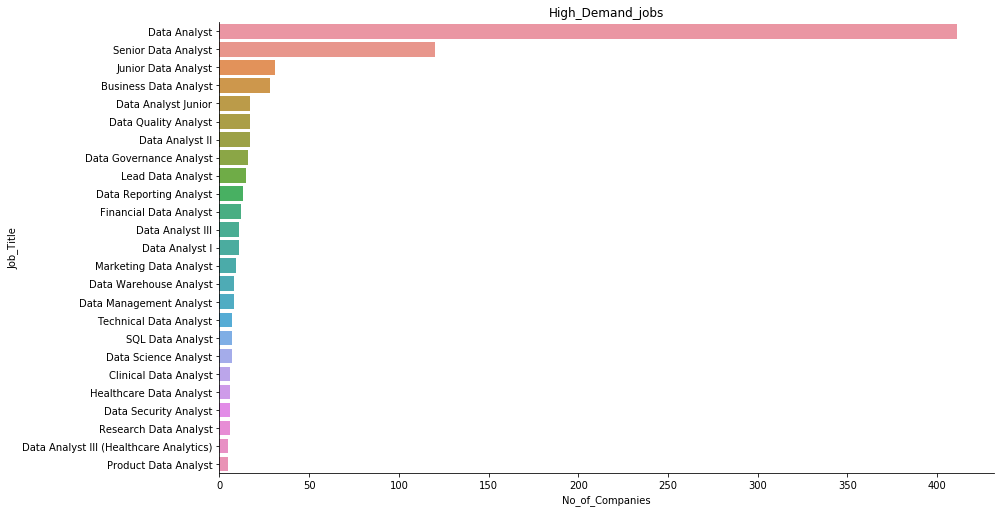

In [58]:
sns.catplot(kind = 'bar' , x = "No_of_Companies" , y = "Job_Title" , data = High_Demand_jobs, height = 7 , aspect = 2)
plt.title("High_Demand_jobs")

In [59]:
from wordcloud import WordCloud

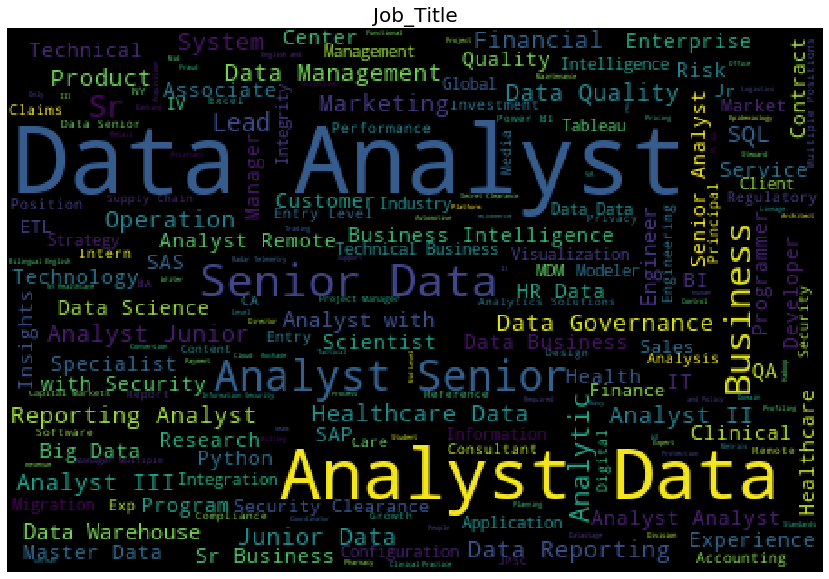

In [60]:
Job_Title=dataset['Job_Title'][~pd.isnull(dataset['Job_Title'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(Job_Title))
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title(dataset['Job_Title'].name,fontsize=20)
plt.imshow(wordCloud)

Now let's Find out Best Jobs  by 
- salary 
- company rating. 


- step by step

In [61]:
high_paid_company_data = dataset.groupby("Company_Name").Avg_salary_USD_k.mean().sort_values(ascending = False).head(250)
high_paid_company_data.head()

Company_Name
Xcutives.com Inc                   150.0
Cognoa                             150.0
LeanData                           150.0
Tesla Motors                       150.0
Risk Management Solutions (RMS)    150.0
Name: Avg_salary_USD_k, dtype: float64

In [62]:
comp_rata_data = dataset.loc[: , ["Company_Name" , "Rating_Range", "Job_Title","State"]]

In [63]:
#pd.options.display.max_rows = 350
High_Paid_jobs = comp_rata_data.merge(high_paid_company_data , how = "inner" , on = "Company_Name")
High_Paid_jobs = High_Paid_jobs.sort_values("Avg_salary_USD_k", ascending = False)
High_Paid_jobs.head(2)

,Company_Name,Rating_Range,Job_Title,State,Avg_salary_USD_k
192,"Iconma, L.L.C.",Medium Rated,Data Analyst,California,150.0
176,Xcutives.com Inc,NaN,Data Analyst with Data Mapping and API,California,150.0


In [66]:
High_Paid_jobs_in_high_rated_company = High_Paid_jobs.loc[High_Paid_jobs.Rating_Range == "High Rated"]
High_Paid_jobs_in_high_rated_company.head(2)

,Company_Name,Rating_Range,Job_Title,State,Avg_salary_USD_k
182,Nuro,High Rated,"Data Analyst, Autonomy Operations",California,150.0
181,Ursus,High Rated,"Data Analyst (SQL, Hive)",California,150.0


In [67]:
High_Paid_jobs_in_high_rated_company = High_Paid_jobs_in_high_rated_company.sort_values(by = "Avg_salary_USD_k" ,
                                                                                        ascending = False , ignore_index = True)
High_Paid_jobs_in_high_rated_company.head(2)

,Company_Name,Rating_Range,Job_Title,State,Avg_salary_USD_k
0,Nuro,High Rated,"Data Analyst, Autonomy Operations",California,150.0
1,Ursus,High Rated,"Data Analyst (SQL, Hive)",California,150.0


In [68]:
Top_30_High_Paid_jobs_in_high_rated_company = High_Paid_jobs_in_high_rated_company.nlargest(30 , "Avg_salary_USD_k")
Top_30_High_Paid_jobs_in_high_rated_company.head(2)

,Company_Name,Rating_Range,Job_Title,State,Avg_salary_USD_k
0,Nuro,High Rated,"Data Analyst, Autonomy Operations",California,150.0
1,Ursus,High Rated,"Data Analyst (SQL, Hive)",California,150.0


In [69]:
Top_23 = Top_30_High_Paid_jobs_in_high_rated_company.groupby("Job_Title").Avg_salary_USD_k.mean()
Top_23 = Top_23.reset_index()
Top_23 = Top_23.sort_values("Avg_salary_USD_k" , ascending = False , ignore_index = True)
Top_23

,Job_Title,Avg_salary_USD_k
0,AI Insights Data Analyst,150.00000
1,"Data Analyst (SQL, Hive)",150.00000
2,"Data Analyst, Autonomy Operations",150.00000
3,Business Intelligence Data Modeler/Analyst,138.50000
4,Data Scientist/Analyst - Wilbur Labs,138.50000
5,Data Studio Analyst,138.50000
6,Data Analyst,128.34375
7,Operations Data Analyst,126.00000
8,Sr Digital Marketing Data Analyst (PAID SOCIAL),122.50000
9,LIMS Master Data Analyst,122.50000


Visualizing Best 23 Jobs in High Rated Companies. 

Text(0.5, 1, 'High Paid Jobs in High Rated Companies')

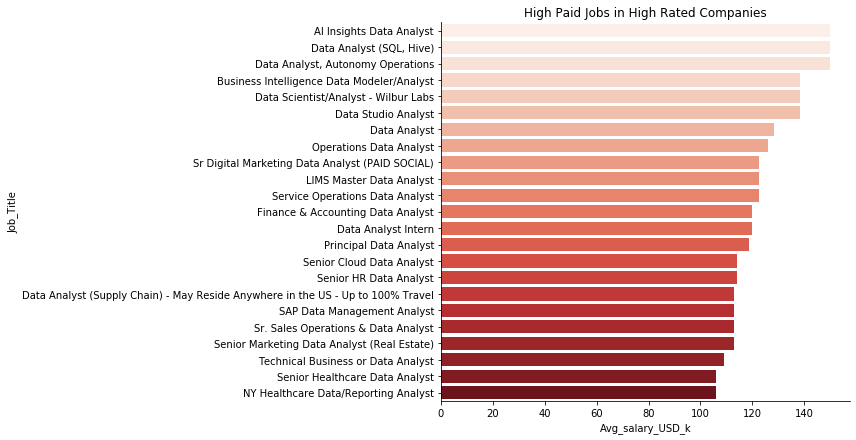

In [70]:
sns.catplot(kind = "bar" , x = "Avg_salary_USD_k"  ,y = "Job_Title" , data = Top_23 , height = 6 , aspect = 2 , 
           palette = "Reds")
plt.title("High Paid Jobs in High Rated Companies")

##### Kindly Upvote If You Like My Work,
                               Thank You!